# 로이터 뉴스 카테고리 분류

In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, LSTM
from keras.utils import np_utils
from keras.datasets import reuters

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [3]:
# 데이터 확인하기
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [5]:
# 데이터 전처리
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [8]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [9]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=30, 
                    validation_data=(x_test, y_test))

W0822 09:59:45.788322  5296 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 09:59:46.366355  5296 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8982 samples, validate on 2246 samples
Epoch 1/30
8982/8982 [==============================] - 13s 1ms/step - loss: 2.6019 - acc: 0.3742 - val_loss: 2.1903 - val_acc: 0.4581
Epoch 2/30
8982/8982 [==============================] - 12s 1ms/step - loss: 2.0810 - acc: 0.4746 - val_loss: 2.0151 - val_acc: 0.4929
Epoch 3/30
8982/8982 [==============================] - 12s 1ms/step - loss: 1.8905 - acc: 0.5223 - val_loss: 1.9766 - val_acc: 0.5009
Epoch 4/30
8982/8982 [==============================] - 12s 1ms/step - loss: 1.7810 - acc: 0.5469 - val_loss: 1.7475 - val_acc: 0.5606
Epoch 5/30
8982/8982 [==============================] - 12s 1ms/step - loss: 1.6627 - acc: 0.5699 - val_loss: 1.6687 - val_acc: 0.5766
Epoch 6/30
8982/8982 [==============================] - 12s 1ms/step - loss: 1.5990 - acc: 0.5855 - val_loss: 1.6349 - val_acc: 0.6015
Epoch 7/30
8982/8982 [==============================] - 12s 1ms/step - loss: 1.5359 - acc: 0.6051 - val_loss: 1.5467 - val_acc: 0.6042
Epoch 8

In [11]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 425us/step

 Test Accuracy: 0.7102


In [12]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_acc']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['acc']

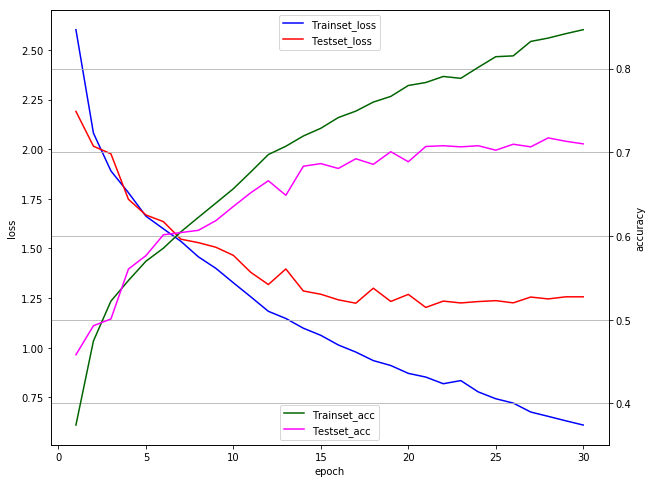

In [14]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.grid()
plt.show()